In [1]:
from pathlib import Path
import os

In [2]:
f = open('splits/classes.txt','r')
contents = f.readlines()
label_to_synset = {}
synset_to_label = {}
for x in contents:
    index = x.find(" ")
    label = x[:index].strip()
    synset = x[index:].strip()
    label_to_synset[label] = synset
    synset_to_label[synset] = label
print(label_to_synset)

{'airplane': '02691156', 'ashcan': '02747177', 'bag': '02773838', 'basket': '02801938', 'bathtub': '02808440', 'bed': '02818832', 'bench': '02828884', 'birdhouse': '02843684', 'bookshelf': '02871439', 'bottle': '02876657', 'bowl': '02880940', 'bus': '02924116', 'cabinet': '02933112', 'camera': '02942699', 'can': '02946921', 'cap': '02954340', 'car': '02958343', 'cellular': '02992529', 'chair': '03001627', 'clock': '03046257', 'dishwasher': '03207941', 'display': '03211117', 'earphone': '03261776', 'faucet': '03325088', 'file': '03337140', 'guitar': '03467517', 'helmet': '03513137', 'jar': '03593526', 'keyboard': '03085013', 'knife': '03624134', 'lamp': '03636649', 'laptop': '03642806', 'loudspeaker': '03691459', 'mailbox': '03710193', 'microphone': '03759954', 'microwave': '03761084', 'motorcycle': '03790512', 'mug': '03797390', 'piano': '03928116', 'pillow': '03938244', 'pistol': '03948459', 'pot': '03991062', 'printer': '04004475', 'remote': '04074963', 'rifle': '04090263', 'rocket':

In [3]:
def _convert_categories(categories):
    assert categories is not None, 'List of categories cannot be empty!'
    if not (c in synset_to_label.keys() + label_to_synset.keys()
            for c in categories):
        warnings.warn('Some or all of the categories requested are not part of \
            ShapeNetCore. Data loading may fail if these categories are not avaliable.')
    synsets = [label_to_synset[c] if c in label_to_synset.keys()
               else c for c in categories]
    return synsets

In [10]:
class_statistic = {}
root = Path('splits/lists')

In [14]:
for class_name in label_to_synset:
    class_folder = root/class_name
    class_count = 0
    for mode in ['train.txt','test.txt','val.txt']:
        f = open(class_folder/mode,'r')
        contents = f.readlines()
        for line in contents:
            class_count += 1
    class_statistic[class_name] = class_count

class_statistic_sorted = {k: v for k, v in sorted(class_statistic.items(), key=lambda item: item[1])}  

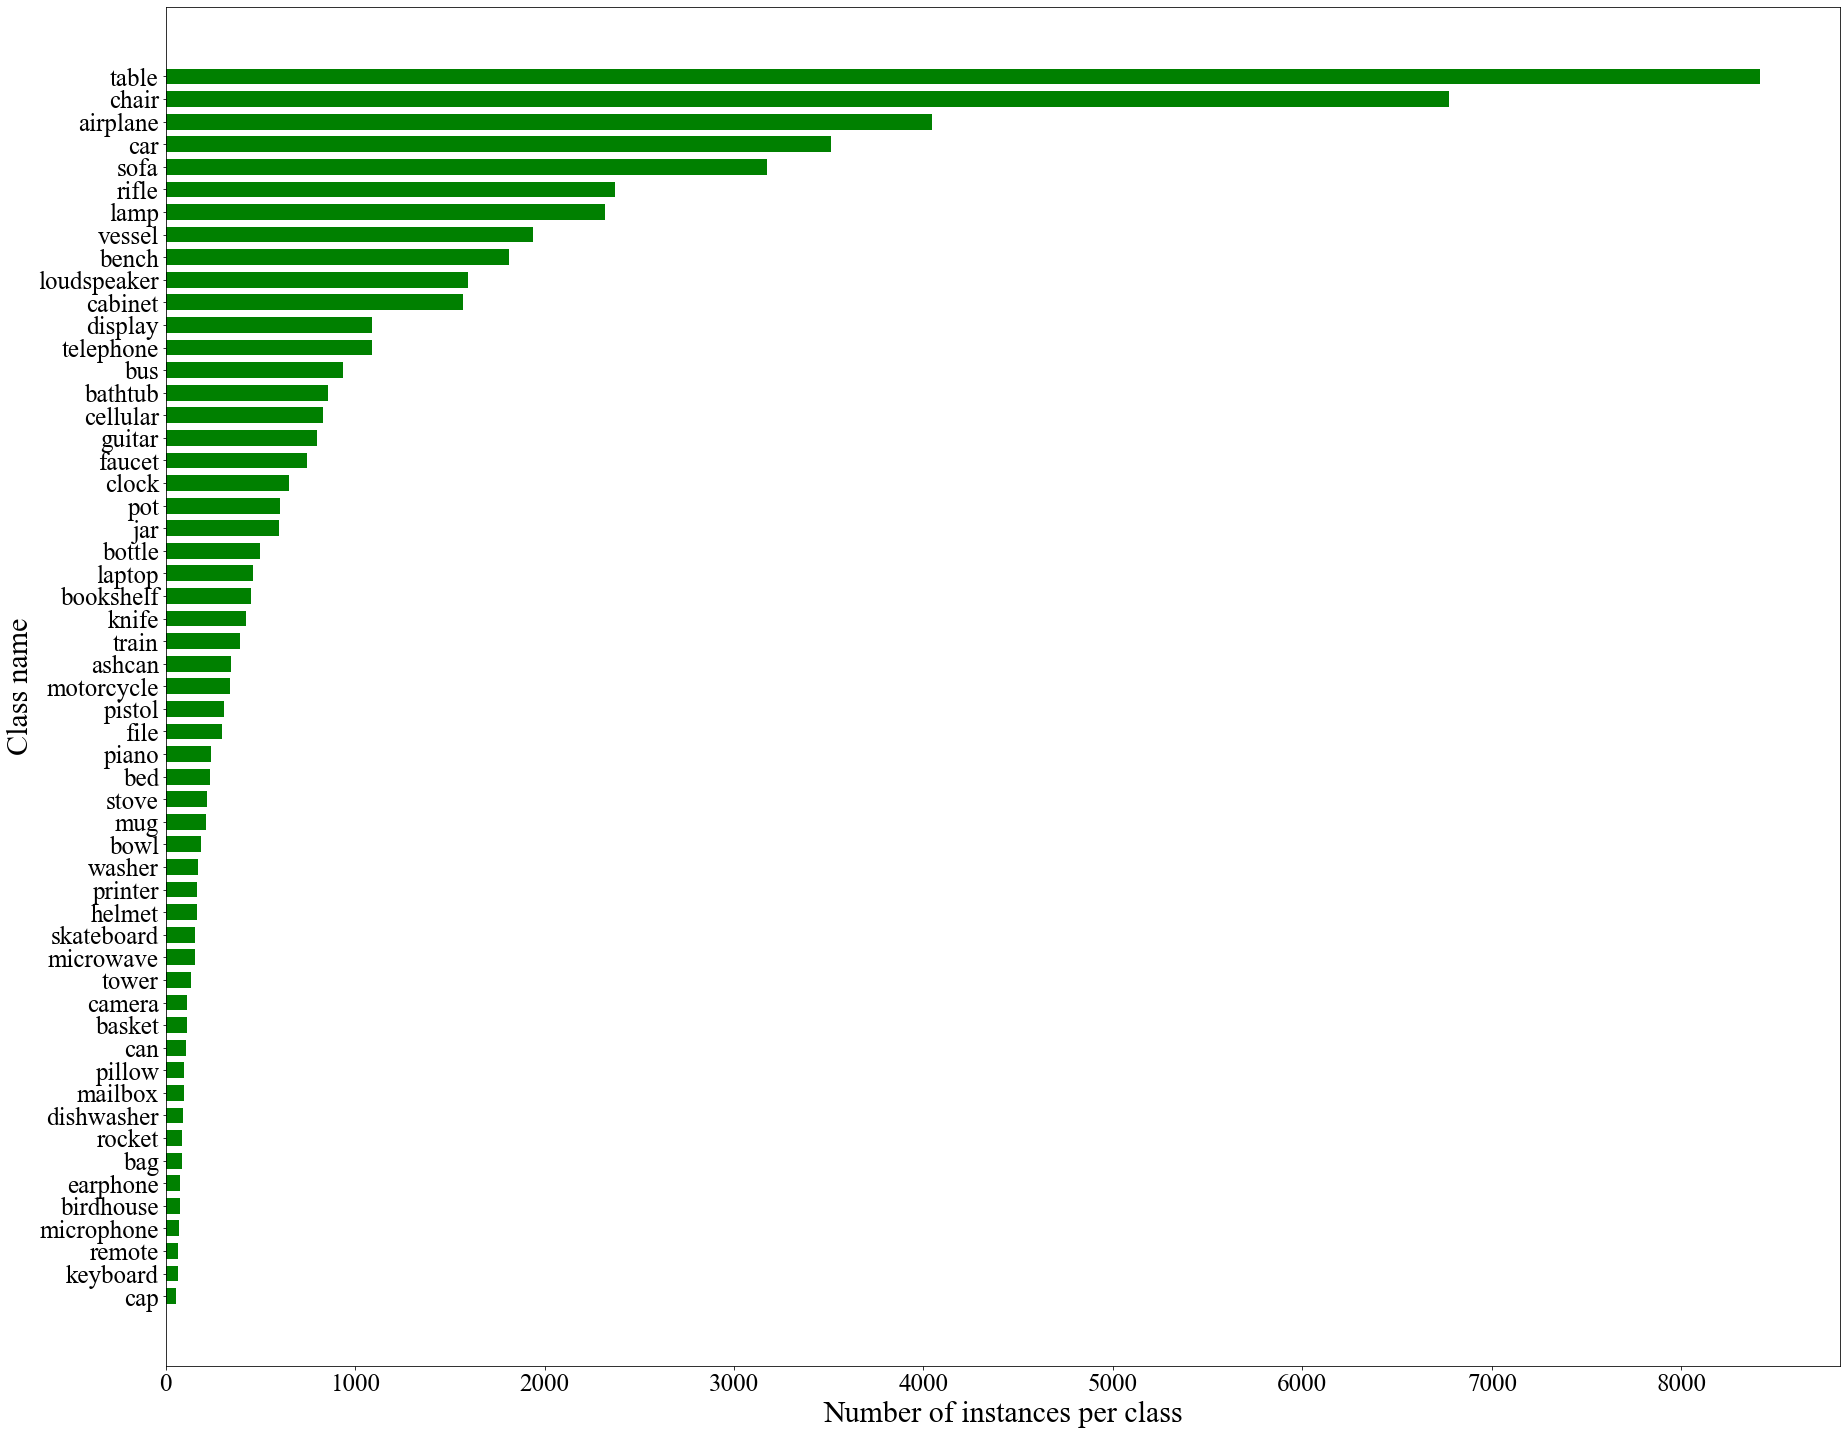

In [35]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30, 25))
plt.barh(list(class_statistic_sorted.keys()),list(class_statistic_sorted.values()),0.7,color="green")
plt.rcParams["font.family"] = "Times New Roman"
plt.xlabel("Number of instances per class",size=30)
plt.ylabel("Class name", size=30)
plt.tick_params(labelsize=25)
plt.rcParams["font.family"] = "Times New Roman"
#plt.show()
plt.savefig('../figs/data_stats.png')  